# Baseline Method

In [24]:
import ee
import geemap
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize()

# Inference on ROI

In [46]:
roi = ee.Geometry.Rectangle([-3.708, 40.416, -3.703, 40.420]) # Example urban area

dataset = ee.ImageCollection('NASA/MEASURES/GFCC/TC/v3') \
                  .filter(ee.Filter.date('2015-01-01', '2015-12-31'))

treeCanopyCover = dataset.select('tree_canopy_cover')

treeCanopyCoverVis = {
  'min': 0.0,
  'max': 100.0,
  'palette': ['ffffff', 'afce56', '5f9c00', '0e6a00', '003800'],
}
m = geemap.Map()
m.add_basemap('SATELLITE')
m.centerObject(roi, 10)
m.addLayer(treeCanopyCover.mean(), treeCanopyCoverVis, 'Tree Canopy Cover')
m.addLayer(roi, {'color': 'red'}, 'ROI')

m

Map(center=[40.418000007144684, -3.705499999957183], controls=(WidgetControl(options=['position', 'transparent…

In [47]:
area_of_roi = roi.area().getInfo()
print('Area of ROI (square meters):', area_of_roi)

# Compute the mean tree canopy cover
canopy_cover = tree_canopy_cover.mean().clip(roi)
# print('Canopy Cover Image:', canopy_cover)

# Calculate the canopy cover percentage within the ROI
canopy_cover_percentage = canopy_cover.reduceRegion(
    reducer=ee.Reducer.mean(),
    geometry=roi,
    scale=30,
    maxPixels=1e9
).getInfo()

print('Canopy Cover Percentage:', canopy_cover_percentage)

# Calculate the canopy cover proportion
canopy_cover_proportion = canopy_cover_percentage['tree_canopy_cover'] / 100
print("Canopy Cover Proportion:", canopy_cover_proportion)

# Estimate the tree count
average_tree_size = 40  # Average tree size in square meters
estimated_tree_count = (area_of_roi / average_tree_size) * canopy_cover_proportion
print('Estimated Tree Count:', estimated_tree_count)

Area of ROI (square meters): 188268.0046736923
Canopy Cover Percentage: {'tree_canopy_cover': 1.757796805767288}
Canopy Cover Proportion: 0.01757796805767288
Estimated Tree Count: 82.7342243108993


# Inference on image from Dataset

Estimated Tree Count: 18418650.0


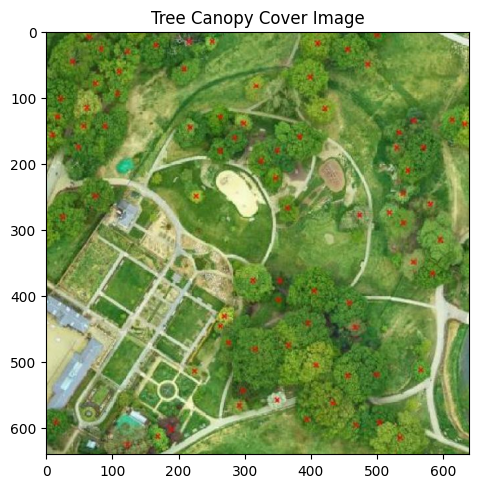

In [21]:
image_path = '/home/jupyter/ee_tree_counting/Data/Combined Dataset/test/images/bp_262118_4_174541_4_19_jpg.rf.83019ff6f2b13a182d37ac45375e012f.jpg'  # Change this to the actual path
image = Image.open(image_path)
image_np = np.array(image)

# Convert the image to a binary mask (1 for tree canopy, 0 for no canopy)
tree_canopy_mask = (image_np > 0).astype(int)

# Calculate the area of the ROI since the image resolution is 30 meters per pixel
pixel_area = 30 * 30  # in square meters
roi_area = tree_canopy_mask.size * pixel_area

# Calculate the canopy cover proportion
canopy_cover_proportion = tree_canopy_mask.sum() / tree_canopy_mask.size

# Estimate the tree count
average_tree_size = 60
estimated_tree_count = (roi_area / average_tree_size) * canopy_cover_proportion

print('Estimated Tree Count:', estimated_tree_count)

# Display the image and mask for visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Tree Canopy Cover Image')
plt.imshow(image_np, cmap='gray')
plt.show()

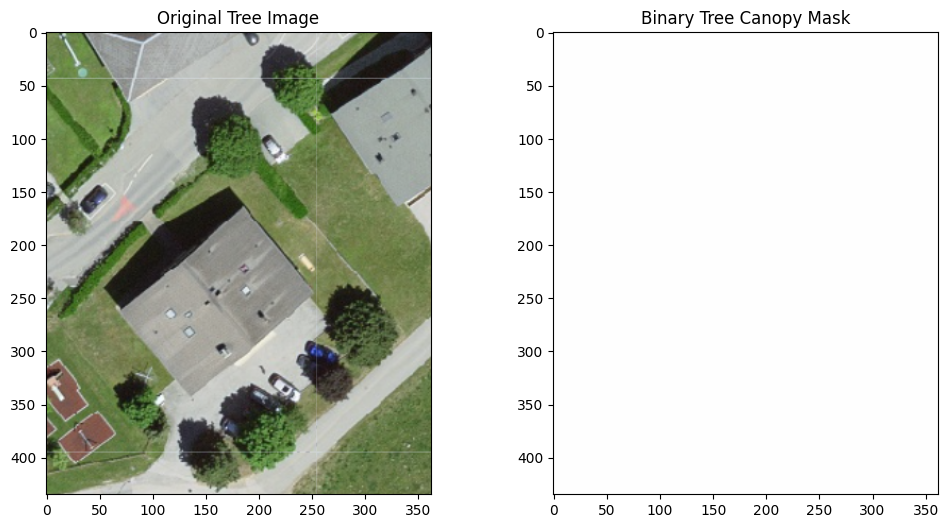

Estimated Tree Count: 9448140.0


In [19]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the random tree image
image_path = '/home/jupyter/ee_tree_counting/Sample Images/small_image.png'  # Change this to the actual path
image = Image.open(image_path)
image_np = np.array(image)

# Convert the image to a binary mask (1 for tree canopy, 0 for no canopy)
# Assuming the image is already processed to highlight tree canopies
tree_canopy_mask = (image_np > 0).astype(int)

# Display the original image and binary mask for verification
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Tree Image')
plt.imshow(image_np, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Binary Tree Canopy Mask')
plt.imshow(tree_canopy_mask, cmap='gray')
plt.show()

# Calculate the pixel area based on the image resolution
# Assuming the resolution is known and is 30 meters per pixel (for example)
pixel_area = 30 * 30  # in square meters

# Calculate the total area of the image
image_area = tree_canopy_mask.size * pixel_area

# Calculate the canopy cover proportion
canopy_cover_proportion = tree_canopy_mask.sum() / tree_canopy_mask.size

# Estimate the tree count
average_tree_size = 60  # in square meters, adjust as necessary
estimated_tree_count = (image_area / average_tree_size) * canopy_cover_proportion

print('Estimated Tree Count:', estimated_tree_count)
